# XGBoost + Kaggle
### <i>[Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course)</i>

##### [Same Notebook in Kaggle](https://www.kaggle.com/code/billyclanton/10-lines-of-code-w-xgboost-feature-importance)

<br/>  

<br/>  

In [1]:
%load_ext cudf.pandas

# 1 - import pandas
import pandas as pd

In [2]:
# 2 - import XGBoost
import xgboost as xgb

In [3]:
# 3 - read CSVs
df = pd.concat([pd.read_csv('train.csv', index_col='Id'), 
                pd.read_csv('test.csv', index_col='Id')])

In [4]:
# 4 - object to cats
for col in df.select_dtypes(include=['object']).columns: 
    df[col] = df[col].astype('category')

In [5]:
# 5 - training df
train_df = df[~df['SalePrice'].isna()]

In [6]:
# 6 - testing df
test_df = df[df['SalePrice'].isna()].drop(['SalePrice'], axis=1)

In [7]:
X = train_df.drop(columns=["SalePrice"]).copy()
y = train_df["SalePrice"].copy()

In [8]:
# 7 - instantiate XGBoost object

xgb_model = xgb.XGBRegressor(**{
    'device': 'cuda', 
    'enable_categorical': True,
})

In [9]:
# 8 - train XGBoost
xgb_model = xgb_model.fit(X=train_df.drop(['SalePrice'], axis=1), 
                          y=train_df['SalePrice'])

In [10]:
# 9 - inference
test_df['SalePrice'] = xgb_model.predict(test_df)

In [11]:
# 10 - submission
test_df[['SalePrice']].reset_index().to_csv("submission.csv", index=False)

<br/>  

<br/>  

# Feature Importance  

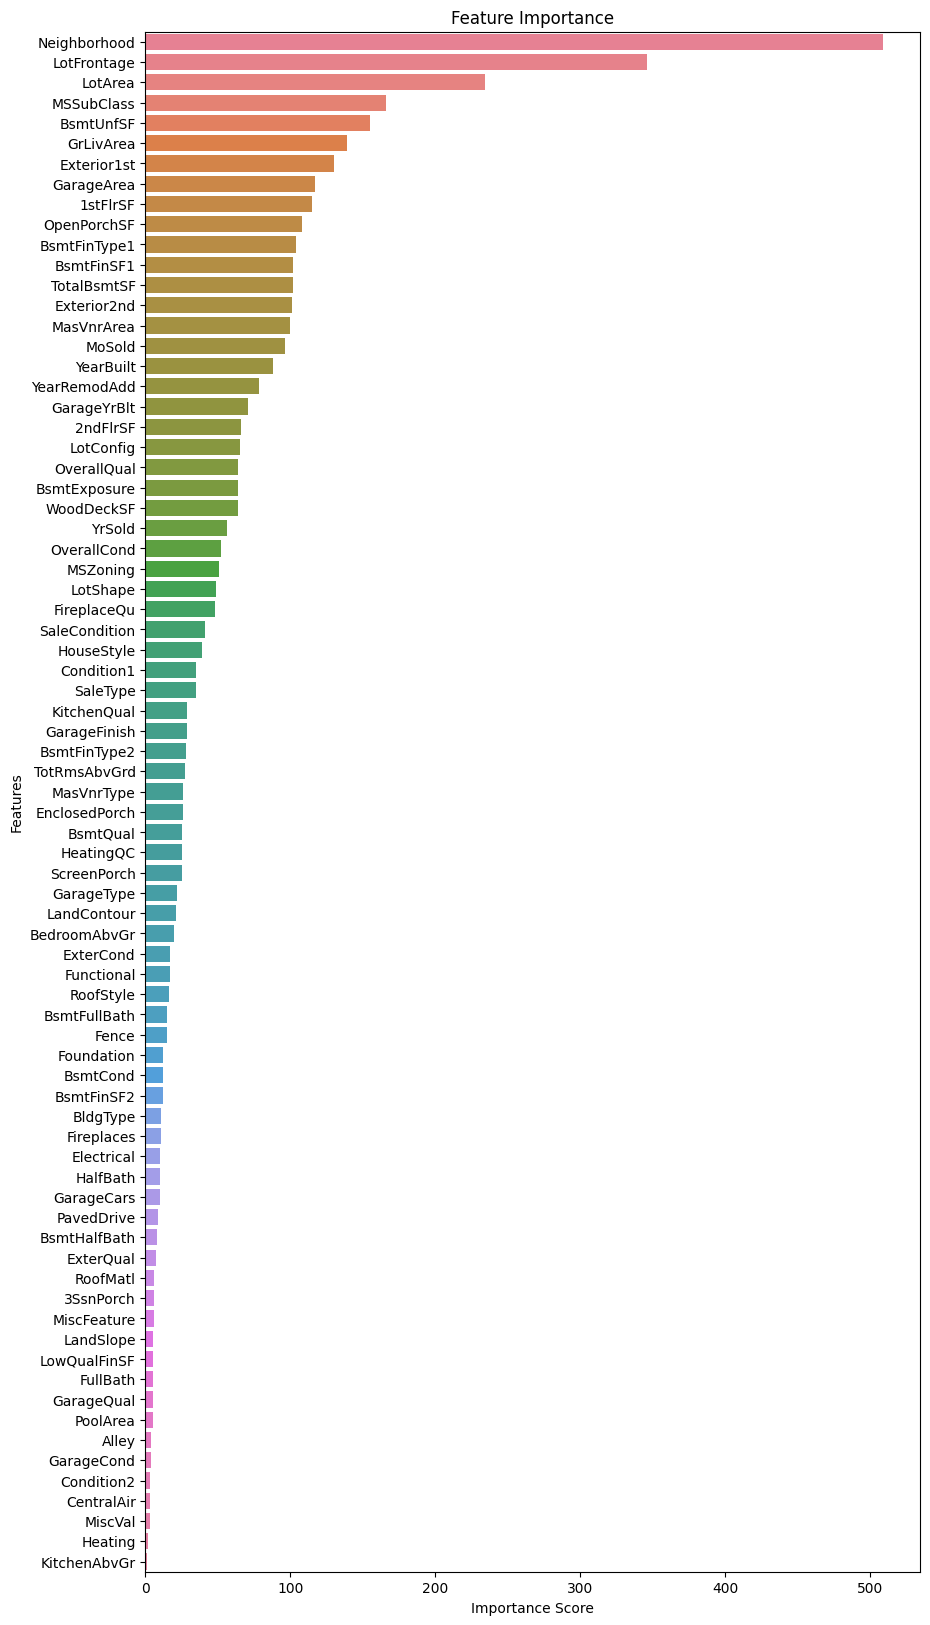

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

booster = xgb_model.get_booster()
importance = booster.get_score(importance_type='weight')  # You can also use 'gain', 'cover', etc.

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 20))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')

sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature')

plt.show()